# Analyzing an initial dataset
We are starting with an archive of the datascience stackexchange questions. Let's quckly walk through the dataset. First, we will load the data.

Before being able to load the csv, make sure you have pre-processed the raw xml using our python package.

In [1]:
import json

from tqdm import tqdm
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ElT
import matplotlib.pyplot as plt
import pandas as pd

from ml_editor import preprocess_input
%matplotlib inline

df = pd.DataFrame.from_csv('data/writers.csv')


/Users/emmanuelameisen/Documents/oreilly/ml-powered-applications/ml-editor/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if sys.path[0] == '':
/Users/emmanuelameisen/Documents/oreilly/ml-powered-applications/ml-editor/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


## Data format

We transformed our data from xml to structured csv. 

How are we going to structure it in order to have labels for our model?

We need to measure the quality of a question. For that, we could:
- Use the number of upvotes a question gets
- Use the number of answers a question gets, or whether they get an answer at all
- Use whether an answer was marked as accepted or not

Let's look at each potential category, and their tradeoffs.

In [2]:
# How many questions do we have
# How many questions have answers, and how many answers per question on avg

df['AnswerCount'] = df['AnswerCount'].fillna(-1)
df["AnswerCount"] = df["AnswerCount"].astype(int)

df['PostTypeId'] = df['PostTypeId'].astype(int)
df['is_question'] = df['PostTypeId'] == 1
df.set_index("Id", inplace=True)

In [3]:
# About 25% of questions are unanswered, if we 
df[df['is_question']]["AnswerCount"].value_counts(normalize=True, sort=True)

1     0.239493
2     0.233346
3     0.177268
4     0.114917
5     0.079162
6     0.045164
7     0.032116
8     0.019069
0     0.018065
9     0.011918
10    0.009660
11    0.005144
12    0.004265
13    0.002635
14    0.002258
15    0.001380
16    0.001004
17    0.001004
21    0.000502
25    0.000376
19    0.000376
22    0.000251
24    0.000125
20    0.000125
41    0.000125
18    0.000125
23    0.000125
Name: AnswerCount, dtype: float64

## Data quality

- How much of the data is missing?
- What is the quality of the text?
- Do the answers match the questions?

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34330 entries, 1 to 42885
Data columns (total 24 columns):
AcceptedAnswerId         4124 non-null float64
AnswerCount              34330 non-null int64
Body                     34256 non-null object
ClosedDate               969 non-null object
CommentCount             34330 non-null int64
CommunityOwnedDate       186 non-null object
CreationDate             34330 non-null object
FavoriteCount            3307 non-null float64
LastActivityDate         34330 non-null object
LastEditDate             11201 non-null object
LastEditorDisplayName    614 non-null object
LastEditorUserId         10648 non-null float64
OwnerDisplayName         1976 non-null object
OwnerUserId              32792 non-null float64
ParentId                 25679 non-null float64
PostTypeId               34330 non-null int64
Score                    34330 non-null int64
Tags                     7971 non-null object
Text                     34256 non-null object
Title  

We have a little over 31.000 questions. Why is the body sometimes null? 

In [5]:
df[df["Body"].isna()]

AcceptedAnswerId  AnswerCount Body ClosedDate  CommentCount  \
Id                                                                   
2145                NaN           -1  NaN        NaN             0   
2147                NaN           -1  NaN        NaN             0   
2215                NaN           -1  NaN        NaN             0   
2218                NaN           -1  NaN        NaN             0   
2225                NaN           -1  NaN        NaN             0   
2227                NaN           -1  NaN        NaN             0   
2233                NaN           -1  NaN        NaN             0   
2238                NaN           -1  NaN        NaN             0   
3138                NaN           -1  NaN        NaN             0   
5148                NaN           -1  NaN        NaN             0   
5150                NaN           -1  NaN        NaN             0   
5152                NaN           -1  NaN        NaN             0   
5162                NaN           -1  NaN        NaN             0   
5551                NaN           -1  NaN        NaN             0   
5553                NaN           -1  NaN        NaN             0   
5555                NaN           -1  NaN        NaN             0   
5797                NaN           -1  NaN        NaN             0   
5832                NaN           -1  NaN        NaN             0   
6261                NaN           -1  NaN        NaN             0   
6313                NaN           -1  NaN        NaN             0   
6360                NaN           -1  NaN        NaN             0   
6362                NaN           -1  NaN        NaN             0   
6364                NaN           -1  NaN        NaN             0   
8125                NaN           -1  NaN        NaN             0   
8481                NaN           -1  NaN        NaN             0   
8731                NaN           -1  NaN        NaN             0   
9915                NaN           -1  NaN        NaN             0   
9978                NaN           -1  NaN        NaN             0   
9980                NaN           -1  NaN        NaN             0   
9982                NaN           -1  NaN        NaN             0   
...                 ...          ...  ...        ...           ...   
25975               NaN           -1  NaN        NaN             0   
25976               NaN           -1  NaN        NaN             0   
26248               NaN           -1  NaN        NaN             0   
27648               NaN           -1  NaN        NaN             0   
31270               NaN           -1  NaN        NaN             0   
31512               NaN           -1  NaN        NaN             0   
33618               NaN           -1  NaN        NaN             0   
33622               NaN           -1  NaN        NaN             0   
33624               NaN           -1  NaN        NaN             0   
33676               NaN           -1  NaN        NaN             0   
34225               NaN           -1  NaN        NaN             0   
34236               NaN           -1  NaN        NaN             0   
34238               NaN           -1  NaN        NaN             0   
34240               NaN           -1  NaN        NaN             0   
34968               NaN           -1  NaN        NaN             0   
36554               NaN           -1  NaN        NaN             0   
37125               NaN           -1  NaN        NaN             0   
37794               NaN           -1  NaN        NaN             0   
38702               NaN           -1  NaN        NaN             0   
38869               NaN           -1  NaN        NaN             0   
39531               NaN           -1  NaN        NaN             0   
39533               NaN           -1  NaN        NaN             0   
39957               NaN           -1  NaN        NaN             0   
40902               NaN           -1  NaN        NaN             0   
41952            

All of the null bodys are of  PostTypeId 4 or 5. The readme file only mentions PostTypeIds of 1 (questions) and 2 (answers). There are 304 rows marked 3 or 4, which we will remove since we do not know what they correspond to.

In [6]:
df[~(df["PostTypeId"].isin([1,2]))]

AcceptedAnswerId  AnswerCount  \
Id                                     
1024                NaN           -1   
1885                NaN           -1   
1886                NaN           -1   
1987                NaN           -1   
1988                NaN           -1   
2141                NaN           -1   
2142                NaN           -1   
2145                NaN           -1   
2146                NaN           -1   
2147                NaN           -1   
2148                NaN           -1   
2150                NaN           -1   
2151                NaN           -1   
2215                NaN           -1   
2216                NaN           -1   
2218                NaN           -1   
2219                NaN           -1   
2220                NaN           -1   
2221                NaN           -1   
2223                NaN           -1   
2224                NaN           -1   
2225                NaN           -1   
2226                NaN           -1   
2227                NaN           -1   
2228                NaN           -1   
2229                NaN           -1   
2230                NaN           -1   
2233                NaN           -1   
2234                NaN           -1   
2238                NaN           -1   
...                 ...          ...   
38937               NaN           -1   
38938               NaN           -1   
39488               NaN           -1   
39489               NaN           -1   
39531               NaN           -1   
39532               NaN           -1   
39533               NaN           -1   
39534               NaN           -1   
39957               NaN           -1   
39958               NaN           -1   
40021               NaN           -1   
40022               NaN           -1   
40227               NaN           -1   
40228               NaN           -1   
40902               NaN           -1   
40903               NaN           -1   
41952               NaN           -1   
41953               NaN           -1   
42223               NaN           -1   
42224               NaN           -1   
42498               NaN           -1   
42499               NaN           -1   
42549               NaN           -1   
42550               NaN           -1   
42551               NaN           -1   
42552               NaN           -1   
42629               NaN           -1   
42630               NaN           -1   
42787               NaN           -1   
42788               NaN           -1   

                                                    Body ClosedDate  \
Id                                                                    
1024   <p>Anyone who hasn't been to any Stack Exchang...        NaN   
1885   <p>"Technique" is literally a method, a way of...        NaN   
1886   Common, repeatable methods of achieving partic...        NaN   
1987   <h2>Critique Guidelines</h2>\n\n<p>Critique re...        NaN   
1988   TAG IS SOON TO BE DEPRECIATED. Please use tags...        NaN   
2141   <p>This tag is not in use, due to its ambiguou...        NaN   
2142   This tag is not in use, due to its ambiguous n...        NaN   
2145                                                 NaN        NaN   
2146   Citations are references to published or unpub...        NaN   
2147                                                 NaN        NaN   
2148   A book recommendation provides a source which ...        NaN   
2150   <p>This tag should be used for questions about...        NaN   
2151   Resources that one may wish to ask about on Wr...        NaN   
2215                                                 NaN        NaN   
2216   Short form writing, often focused on the aesth...        NaN   
2218                                                 NaN        NaN   
2219   Style defines the form that a piece of writing...        NaN   
2220   <p>Fiction is a form of prose writing that dea...        NaN   
2221   Fiction is a form of prose writing that deals ...        Na

In [7]:
# Filtering out PostTypeIds other than documented ones
df = df[df["PostTypeId"].isin([1,2])]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33650 entries, 1 to 42885
Data columns (total 24 columns):
AcceptedAnswerId         4124 non-null float64
AnswerCount              33650 non-null int64
Body                     33650 non-null object
ClosedDate               969 non-null object
CommentCount             33650 non-null int64
CommunityOwnedDate       186 non-null object
CreationDate             33650 non-null object
FavoriteCount            3307 non-null float64
LastActivityDate         33650 non-null object
LastEditDate             10521 non-null object
LastEditorDisplayName    606 non-null object
LastEditorUserId         9975 non-null float64
OwnerDisplayName         1971 non-null object
OwnerUserId              32117 non-null float64
ParentId                 25679 non-null float64
PostTypeId               33650 non-null int64
Score                    33650 non-null int64
Tags                     7971 non-null object
Text                     33650 non-null object
Title   

Now let's look at questions and accepted answers and see if they match!

In [9]:
questions_with_accepted_answers = df[df["is_question"] & ~(df["AcceptedAnswerId"].isna())]
q_and_a = questions_with_accepted_answers.join(df[["Text"]], on='AcceptedAnswerId', how='left', rsuffix="_answer")

pd.options.display.max_colwidth = 500
q_and_a[["Text", "Text_answer"]][:5]

Text  \
Id                                                                                                                                                                                                                                                                                                                      
1   I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n   
2                                                 What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?\nFor example, writing in the first person you are always following a character, while in the third person you can "jump" between story lines.\n   
3                                                                                                                                                                                                                         I finished my novel, and everyone I've talked to says I need an agent. How do I find one?\n   
7                                                                                                                                                                                         I keep hearing about literary fiction, and how it is so much better than genre fiction. What exactly is literary fiction?\n   
11                                                                                                                                                                                                                                            I heard a writer talking about pantsing a story. What does that mean?\n   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Text_answer  
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1   When I'm thinking about where I learned most how to write, I think that reading was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I need when re...  
2   With a story in first person, you are intending the reader to become much more attached to the main character.  Since the reader sees what that character sees and feels what that character feels, the reader will have an emotional investment in that character.  Third person does not have this close tie; a reader can become emotionally invested but it will not be as strong as it will be in first person.\nContrarily, you cannot have multiple point characters when you use first person without ex...  
3   Try and find a list of agents who write in your genre. Check out their websites!\nFin

So far so good, and the text seems good except for potentially unescaped newlines characters ("\n")

## Data quantity and distribution

- How many questions do we have?
- How many do we have of each class or type?

In [10]:
has_accepted_answer = df[df["is_question"] & ~(df["AcceptedAnswerId"].isna())]
no_accepted_answers = df[df["is_question"] & (df["AcceptedAnswerId"].isna()) & (df["AnswerCount"]!=0)]
no_answers = df[df["is_question"] & (df["AcceptedAnswerId"].isna()) & (df["AnswerCount"]==0)]

print("%s questions with no answers, %s with answers, %s with an accepted answer" % (len(no_answers),
     len(no_accepted_answers),
     len(has_accepted_answer)))

144 questions with no answers, 3703 with answers, 4124 with an accepted answer


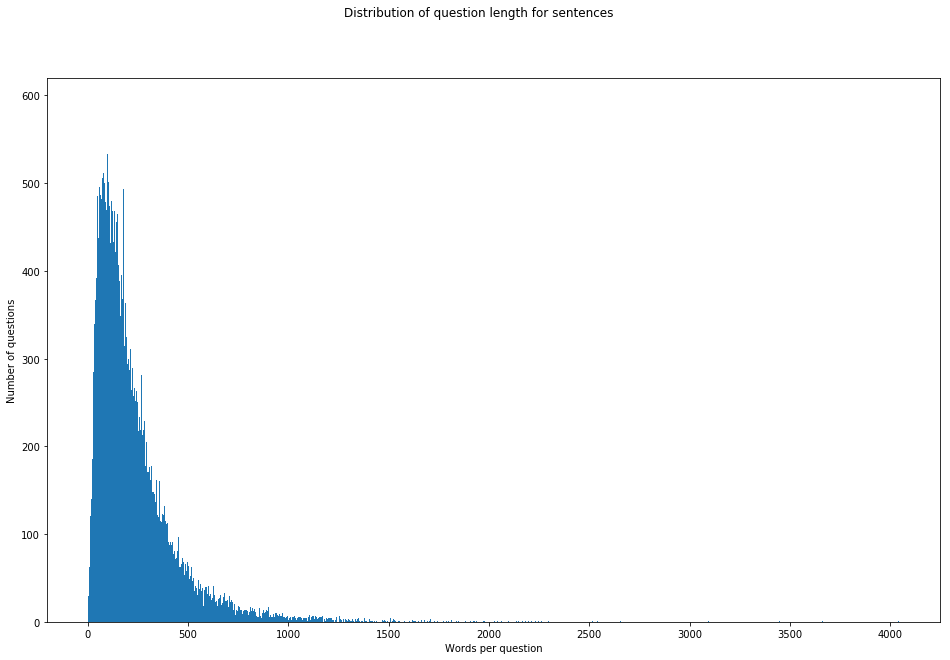

In [11]:
fig = plt.figure(figsize=(16,10))
fig.suptitle('Distribution of question length for sentences')
plt.xlabel('Words per question')
plt.ylabel('Number of questions')
q_len = plt.hist(df["question_len"], bins=1000, log=False)

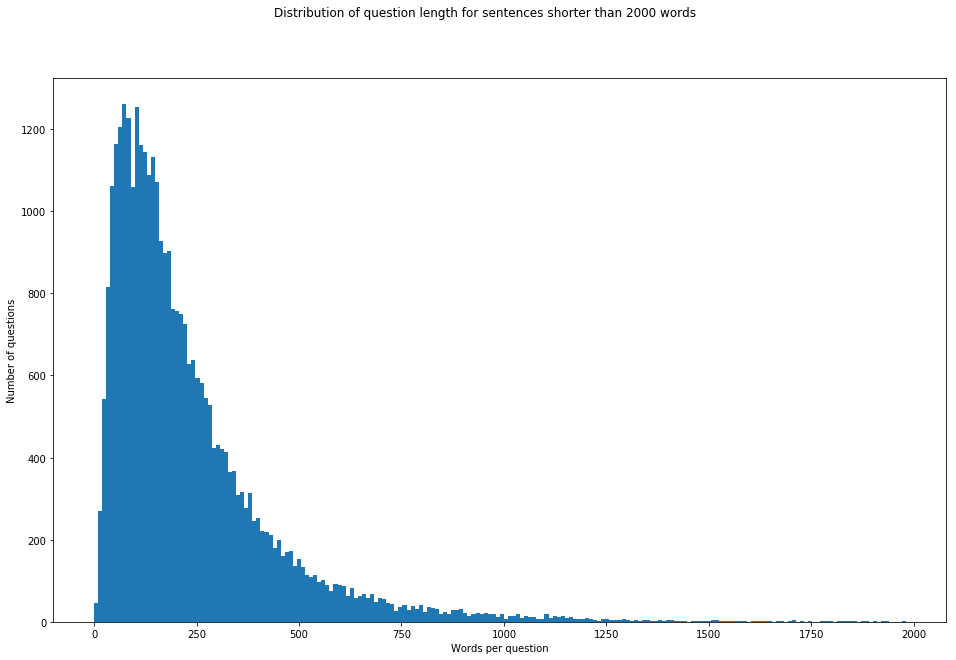

In [12]:
fig = plt.figure(figsize=(16,10))
fig.suptitle(
    'Distribution of question length for sentences shorter than 2000 words')
plt.xlabel('Words per question')
plt.ylabel('Number of questions')
plt.figsize=(16,10)
q_len_trunc = plt.hist(df[df["question_len"]<2000]["question_len"], bins=200, log=False)

Text(0, 0.5, 'Percentage of sentences')

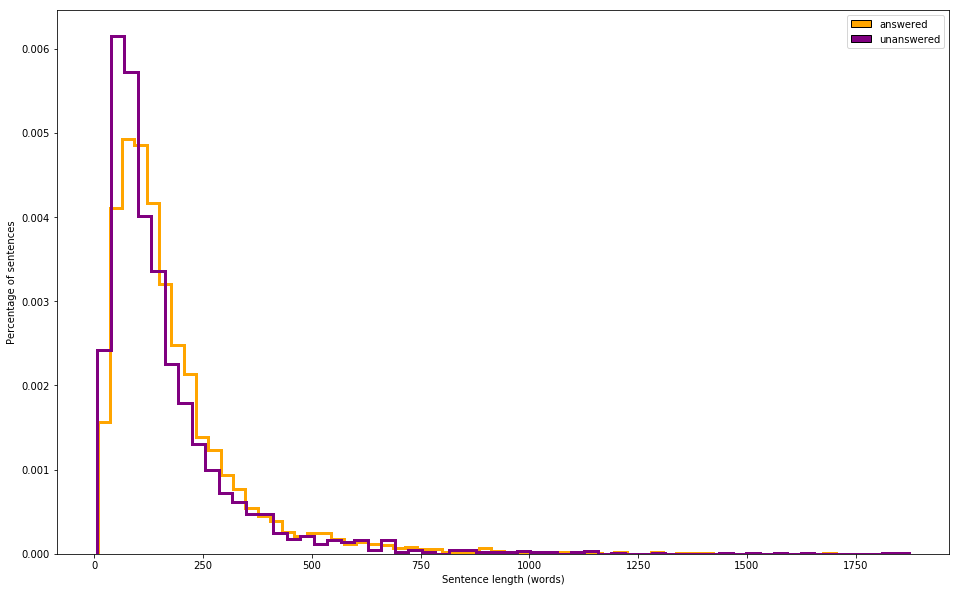

In [13]:
from matplotlib.patches import Rectangle

ax = df[df["is_question"] &
        ~(df["AcceptedAnswerId"].isna()) &
        (df["question_len"] < 2000)]["question_len"].hist(bins=60,
                                                          density=True,
                                                          histtype='step',
                                                          color='orange',
                                                          linewidth=3,
                                                          grid=False,
                                                          figsize=(16, 10))

df[df["is_question"] &
   (df["AcceptedAnswerId"].isna()) &
   (df["question_len"] < 2000)]["question_len"].hist(bins=60,
                                                     density=True,
                                                     histtype='step',
                                                     color='purple',
                                                     linewidth=3,
                                                     grid=False)

handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in
           ['orange', 'purple']]
labels = ["answered", "unanswered"]
plt.legend(handles, labels)
ax.set_xlabel("Sentence length (words)")
ax.set_ylabel("Percentage of sentences")

In [14]:
# no answers
df[df["is_question"]]["AnswerCount"].value_counts()

1     1909
2     1860
3     1413
4      916
5      631
6      360
7      256
8      152
0      144
9       95
10      77
11      41
12      34
13      21
14      18
15      11
16       8
17       8
21       4
25       3
19       3
22       2
24       1
20       1
41       1
18       1
23       1
Name: AnswerCount, dtype: int64

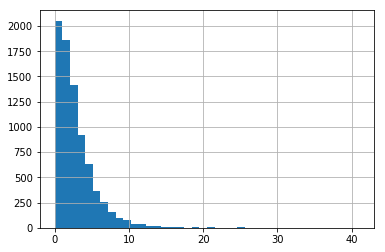

In [15]:
hist = df[df["is_question"]]["AnswerCount"].hist(bins=40)

In [16]:
# How many questions have accepted answers
# What is the distribution of question scores


## Let's vectorize our data to explore it

### How would we vectorize tabular fields?

Let's pretend we wanted to predict the **score** from the tags, number of comments, and question creation date

In [17]:
tabular_df = df[df["is_question"]][["Tags", "CommentCount", "CreationDate", "Score"]]
tabular_df.head()

Tags  CommentCount  \
Id                                                               
1                 <resources><first-time-author>             7   
2    <fiction><grammatical-person><third-person>             0   
3                     <publishing><novel><agent>             1   
5   <plot><short-story><planning><brainstorming>             0   
7                   <fiction><genre><categories>             1   

               CreationDate  Score  
Id                                  
1   2010-11-18T20:40:32.857     32  
2   2010-11-18T20:42:31.513     20  
3   2010-11-18T20:43:28.903     34  
5   2010-11-18T20:43:59.693     28  
7   2010-11-18T20:45:44.067     21

Normalize numerical input features. 

Get dummy variables from categorical features

Extract structure from date features.

In [18]:
def get_norm(df, col):
    return (df[col] - df[col].mean()) / (df[col].max() - df[col].min())
tabular_df["NormComment"]= get_norm(tabular_df, "CommentCount")
tabular_df["NormScore"]= get_norm(tabular_df, "Score")

In [19]:
tabular_df.head()

Tags  CommentCount  \
Id                                                               
1                 <resources><first-time-author>             7   
2    <fiction><grammatical-person><third-person>             0   
3                     <publishing><novel><agent>             1   
5   <plot><short-story><planning><brainstorming>             0   
7                   <fiction><genre><categories>             1   

               CreationDate  Score  NormComment  NormScore  
Id                                                          
1   2010-11-18T20:40:32.857     32     0.165706   0.140501  
2   2010-11-18T20:42:31.513     20    -0.103524   0.077674  
3   2010-11-18T20:43:28.903     34    -0.065063   0.150972  
5   2010-11-18T20:43:59.693     28    -0.103524   0.119558  
7   2010-11-18T20:45:44.067     21    -0.065063   0.082909

In [20]:
tabular_df['date'] = pd.to_datetime(tabular_df['CreationDate'])

tabular_df['year'] = tabular_df['date'].dt.year
tabular_df['month'] = tabular_df['date'].dt.month
tabular_df['day'] = tabular_df['date'].dt.day
tabular_df['hour'] = tabular_df['date'].dt.hour

In [21]:
tabular_df.head()

Tags  CommentCount  \
Id                                                               
1                 <resources><first-time-author>             7   
2    <fiction><grammatical-person><third-person>             0   
3                     <publishing><novel><agent>             1   
5   <plot><short-story><planning><brainstorming>             0   
7                   <fiction><genre><categories>             1   

               CreationDate  Score  NormComment  NormScore  \
Id                                                           
1   2010-11-18T20:40:32.857     32     0.165706   0.140501   
2   2010-11-18T20:42:31.513     20    -0.103524   0.077674   
3   2010-11-18T20:43:28.903     34    -0.065063   0.150972   
5   2010-11-18T20:43:59.693     28    -0.103524   0.119558   
7   2010-11-18T20:45:44.067     21    -0.065063   0.082909   

                      date  year  month  day  hour  
Id                                                  
1  2010-11-18 20:40:32.857  2010     11   18    20  
2  2010-11-18 20:42:31.513  2010     11   18    20  
3  2010-11-18 20:43:28.903  2010     11   18    20  
5  2010-11-18 20:43:59.693  2010     11   18    20  
7  2010-11-18 20:45:44.067  2010     11   18    20

In [22]:
# Select our tags, represented as strings, and transform them into arrays of tags
tags = tabular_df["Tags"]
clean_tags = tags.str.split("><").apply(
    lambda x: [a.strip("<").strip(">") for a in x])

# Use pandas' get_dummies to get dummy values 
# select only tags that appear over 500 times
tag_columns = pd.get_dummies(clean_tags.apply(pd.Series).stack()).sum(level=0)
all_tags = tag_columns.astype(bool).sum(axis=0).sort_values(ascending=False)
top_tags = all_tags[all_tags > 500]
top_tag_columns = tag_columns[top_tags.index]




In [23]:
top_tag_columns.head()

creative-writing  fiction  style  characters  technique  novel  publishing
Id                                                                            
1                  0        0      0           0          0      0           0
2                  0        1      0           0          0      0           0
3                  0        0      0           0          0      1           1
5                  0        0      0           0          0      0           0
7                  0        1      0           0          0      0           0

In [24]:
# Add our tags back into our initial DataFrame
final = pd.concat([tabular_df, top_tag_columns], axis=1)

# Keeping only the vectorized features
col_to_keep = ["year", "month", "day", "hour", "NormComment",
               "NormScore"] + list(top_tags.index)
final_features = final[col_to_keep]

In [25]:
all_tags

creative-writing            1351
fiction                     1253
style                        991
characters                   609
technique                    549
novel                        531
publishing                   529
character-development        419
plot                         405
technical-writing            345
dialogue                     318
fantasy                      306
editing                      289
academic-writing             277
formatting                   273
copyright                    267
structure                    265
self-publishing              235
word-choice                  234
legal                        234
citations                    230
description                  210
short-story                  205
screenwriting                190
software                     188
non-fiction                  174
tools                        170
planning                     159
science-fiction              154
resources                    154
          

### And how do we vectorize text?

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Create an instance of a tfidf vectorizer, 
# We could use CountVectorizer for a non normalized version
vectorizer = TfidfVectorizer()

# Fit our vectorizer to questions in our dataset
# Returns an array of vectorized text
bag_of_words = vectorizer.fit_transform(df[df["is_question"]]["Text"])


raw_text = df[df["is_question"]]["Text"]
sent_labels = df[df["is_question"]]["AcceptedAnswerId"].notna()

bag_of_words.shape

(7971, 30158)

In [27]:
import spacy

# We load a large model, and disable pipeline unnecessary parts for our task
# This speeds up the vectorization process significantly
# See https://spacy.io/models/en#en_core_web_lg for details about the model
nlp = spacy.load('en_core_web_lg', disable=["parser", "tagger", "ner", "textcat"])

# We then simply get the vector for each of our questions
# By default, the vector returned is the average of all vectors in the sentence
# See https://spacy.io/usage/vectors-similarity for more
spacy_emb = df[df["is_question"]]["Text"].apply(lambda x: nlp(x).vector)


In [28]:
# https://spacy.io/usage/vectors-similarity
# https://spacy.io/models/en#en_core_web_lg
spacy_emb = df[df["is_question"]]["Text"].apply(lambda x: nlp(x).vector)


In [29]:
import umap
# TODO remove seaborn?
import seaborn as sns
import numpy as np 

sns.set(style='white', context='notebook', rc={'figure.figsize':(12,10)})

In [30]:
embeddings = list(spacy_emb)

umap_embedder = umap.UMAP()
umap_emb = umap_embedder.fit_transform(embeddings)


(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)


Text(0, 0.5, 'y')

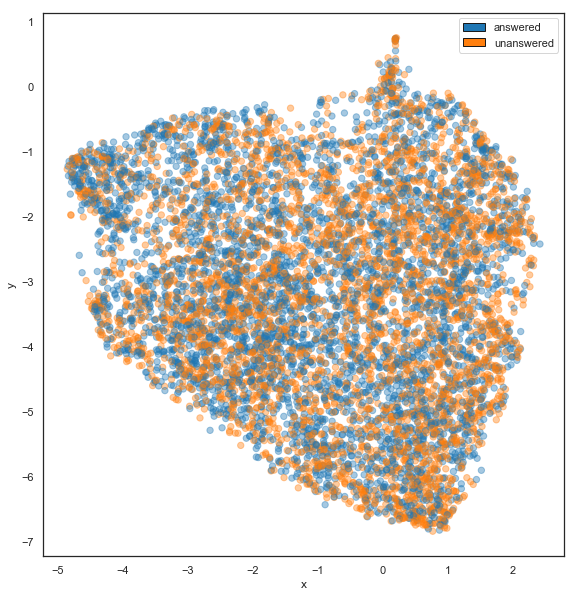

In [31]:
fig = plt.figure(figsize=(16, 10))
color_map = {
    True: '#1f77b4',
    False:'#ff7f0e'
}
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], 
            c=[color_map[x] for x in sent_labels], 
          s=40, alpha=0.4)

handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in
           ['#1f77b4', '#ff7f0e']]
labels = ["answered", "unanswered"]
plt.legend(handles, labels)

print(sns.color_palette()[False])
plt.gca().set_aspect('equal', 'box')
plt.gca().set_xlabel("x")
plt.gca().set_ylabel("y")

In [32]:
from io import BytesIO
from PIL import Image
import base64
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10, Category10

output_notebook()

def get_umap_embeddings_plot(umap_vectors, labels, text, legends, tooltip_label=None):
    if not tooltip_label:
        print("Using standard label")
        tooltip_label = labels
    w2v_df = pd.DataFrame(umap_vectors, columns=('x', 'y'))
    print(len(w2v_df))
    w2v_df['label'] = [str(x) for x in labels]
    w2v_df['tooltip_label'] = [str(x) for x in tooltip_label]
    w2v_df['text'] = list(text)
    w2v_df['legends'] = ["Answered" if el else "Unanswered" for el in list(legends)]
    datasource = ColumnDataSource(w2v_df)

    color_mapping = CategoricalColorMapper(factors=['True','False'], palette=['#1f77b4', '#ff7f0e'])

    TOOLTIPS = [
        ("text", "@text"),
        ('got_answer', '@tooltip_label')
    ]
    hover = HoverTool(tooltips=TOOLTIPS)
    hover.attachment ='right'

    plot_figure = figure(
        title='UMAP projection of questions',
        plot_width=900,
        plot_height=600,
        tools=('pan, wheel_zoom, reset', 'box_zoom', 'undo')
    )
    plot_figure.add_tools(hover)
    
    plot_figure.circle(
        'x',
        'y',
        source=datasource,
        color=dict(field='label', transform=color_mapping),
        legend='legends',
        line_alpha=0,
        fill_alpha=0.4,
        size=5
    )
    return plot_figure

plot_figure = get_umap_embeddings_plot(umap_emb, sent_labels, raw_text, legends=sent_labels)
show(plot_figure)

Loading BokehJS ...

Using standard label
7971


In [33]:
df[df["Text"].str.contains("Made up")]

AcceptedAnswerId  AnswerCount  \
Id                                     
19794               NaN            4   
23425           23444.0            3   
31374               NaN           -1   
34780               NaN           -1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Body  \
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
19794                                                                                                                                                                     <p>(Made up character) Farrel jumps from his rambler house roof but lands horizontally and on his left arm. His left arms ulna snaps and pierces out of his skin. This is just an example because I'm having trouble with my real story (where the main character gets impaled on rebar) but having trouble explaining it in first person.</p>\n   
23425  <p>I'm writing a fantasy story in which there is a contemporary earth (our earth) and a secondary world. Due to certain reasons <strong>all</strong> earthlings who are able to reach the second world have great magical powers which can cause great ruckus.</p>\n\n<p>My problem is that I need to explain whether other earthlings in the past have caused conflicts inside the second world, before the main characters of the story.</p>\n\n<p>If it happened, I need to figure out why am I narrating the...   
31374  <p>First, I would not do the "translation" of your last sentence.</p>\n\n<p>Second, you need to understand that swear words are typically one or two syllables, and the <strong><em>audio effect</em></strong> needs to be somewhat similar.</p>\n\n<p>Another word for "fuck" is "intercourse", but it is nearly impossible to use "intercourse!" as a swear word, in places where we would normally say "fuck!". "Intercourse you" sounds stupid. "Oh intercourse!" when I stub my toe sounds stupid. "Interco...   
34780  <blockquote>\n  <p>Is it ok to use fake words like that?</p>\n</blockquote>\n\n<p>If you are making up the culture, that is fine. Slang changes, year by year and city by city, all over the world. Some sticks longer than others, some even become part of the language (like "cool"). Others fade out ("the bees knees" used to mean very cool).</p>\n\n<p>Part of what makes them stick is brevity in speech, single syllable words that are quick and easy to say (few mouth or tongue movements) slang sti...   

                    ClosedDate  CommentCount CommunityOwnedDate  \
Id                                                                
19794  2015-11-23T16:07:29.097             1                NaN   
23425                      NaN             0                NaN   
31374                      NaN            13                NaN   
34780                      NaN             0                NaN   

                  CreationDate  FavoriteCount         LastActivityDate  \
Id                                                                       
19794  2015-11-19T23:51:56.440            NaN  2015-11-20T16:39:43.453   
23425  2016-06-18T18:11:45.837            1.0  2016-06-19T21:52:54.383   
31374 

## Let's cluster our data

In [34]:
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=3)
clusters = clus.fit_predict(embeddings)

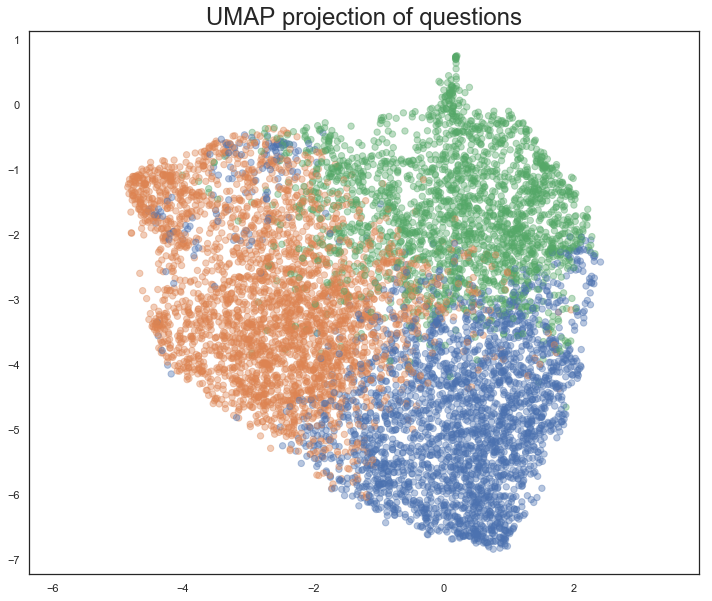

In [35]:
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], c=[sns.color_palette()[x] for x in clusters], s=40, alpha=.4)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of questions', fontsize=24);

For n_clusters = 2 The average silhouette_score is : 0.2809656


AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

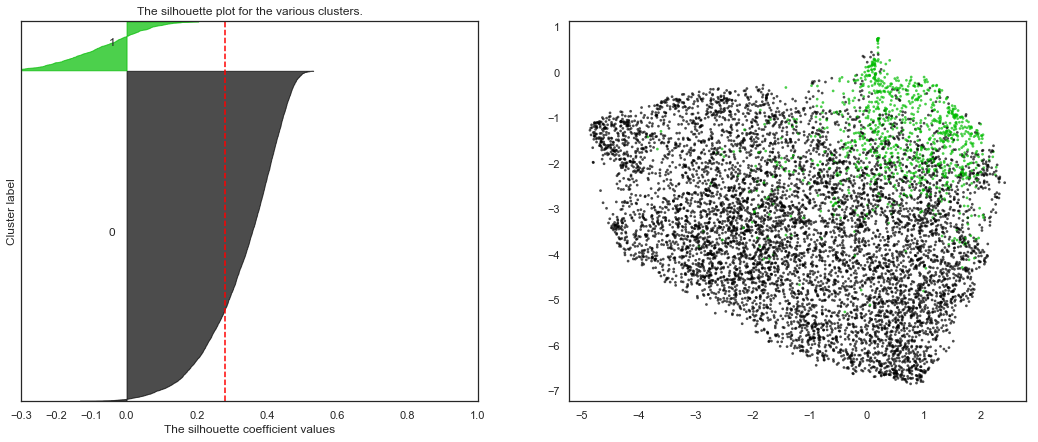

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
range_n_clusters = [2, 3, 4, 5, 6]

to_clus = embeddings

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.3, .4])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(to_clus) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(to_clus)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(to_clus, cluster_labels, metric='cosine')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(to_clus, cluster_labels, metric='cosine')

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(umap_emb[:, 0], umap_emb[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centerss = clusterer.cluster_centers_
    centers = umap_embedder.transform(centerss)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
#         a = umap_embedder.transform([c])[0]
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

## Let's try a simple model

First, let's split our data in train and test

In [ ]:
from sklearn.model_selection import train_test_split

# Starting with a random split
X_train, X_test, y_train, y_test = train_test_split(embeddings, sent_labels, test_size=0.2, 
                                                                                random_state=40)


In [ ]:
sent_labels.value_counts()

In [ ]:
df[df["is_question"]]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial', n_jobs=-1, random_state=40)
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Answered','Unanswered'], normalize=False, title='Confusion matrix')
plt.show()
